In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np

In [2]:
fp_root = Path("/nwp/danra/data/v0.3.0")

In [3]:
ds_sl = xr.open_zarr(fp_root / "single_levels.zarr")
ds_sl

<xarray.Dataset>
Dimensions:          (time: 29120, y: 589, x: 789)
Coordinates:
    lat              (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon              (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * time             (time) datetime64[ns] 1990-09-01 ... 2000-08-18T21:00:00
  * x                (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y                (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables: (12/27)
    cape_column      (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    cb_column        (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    ct_column        (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    grpl_column      (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    hcc0m            (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    icei0m           (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    ...               ...
    t0m              (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    t2m              (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    u10m             (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    v10m             (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    vis0m            (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    xhail0m          (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

In [4]:
# find all zarr file chunks within the .zarr directories, filename format is
# `*.*.*.*` or `*.*.*` by walking the directory tree

zarr_files = list(fp_root.rglob("*.zarr"))
filesizes = [[], [], []]
for fp_zarr in zarr_files:
    # walk the subdirs of the zarr directory
    for n, glob_pattern in enumerate(["*.*.*", "*.*.*.*", "*.*.*.*.*"]):
        for fp_chunk in fp_zarr.rglob(glob_pattern):
            # get the filesize
            size = fp_chunk.stat().st_size
            filesizes[n].append(size / 1024 / 1024)

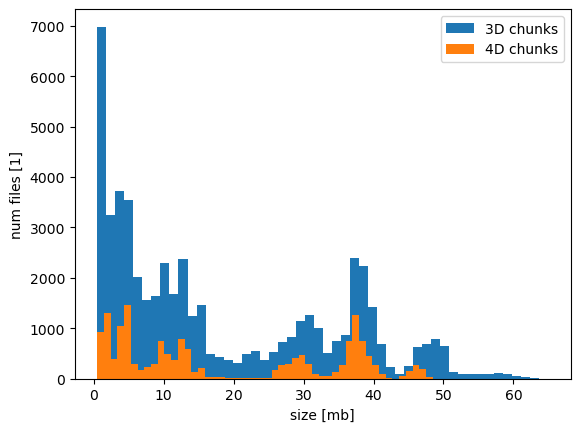

In [5]:
# plot histogram of file sizes
fig, ax = plt.subplots()
for n in range(len(filesizes)):
    if len(filesizes[n]) > 0:
        ax.hist(filesizes[n], bins=50, label=f"{n+3}D chunks")
ax.set_xlabel("size [mb]")
ax.set_ylabel("num files [1]")
ax.legend()


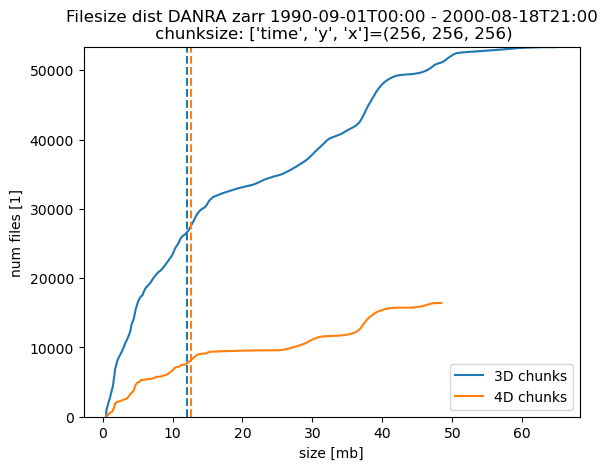

In [7]:
fig, ax = plt.subplots()
for n in range(len(filesizes)):
    if len(filesizes[n]) > 0:
        l = sns.ecdfplot(filesizes[n], label=f"{n+3}D chunks", stat="count").lines[-1]
        ax.axvline(np.median(filesizes[n]), linestyle='--', color=l.get_color())
ax.set_xlabel("size [mb]")
ax.set_ylabel("num files [1]")
ax.legend()
def _tformat(da):
    return da.dt.strftime("%Y-%m-%dT%H:%M").item()
chunksize = ds_sl.t2m.data.chunksize
dims = list(ds_sl.t2m.dims)
ax.set_title(f"Filesize dist DANRA zarr {_tformat(ds_sl.time.min())} - {_tformat(ds_sl.time.max())}\n chunksize: {dims}={chunksize}")
fig.savefig(f"chunk_sizedist_{'x'.join(map(str, chunksize))}.png")

In [36]:
all_filesize = filesizes[0] + filesizes[1] + filesizes[2]
import numpy as np
np.median(all_filesize)

3.340958595275879